In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.full((grid_size, grid_size), 0, dtype=int)
        self.t = 0
        self.pl_data = []
        self.slope_data ={}

        
    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()

    def find_high_piles(self):
        x, y = np.where(self.grid > 4)
        return list(zip(x, y))

        
    def topple(self):
        unstable = True
        num_affected_squares = 0
        n_g = np.sum(self.grid)
        #self.slope.append(self.get_total_slope())
        while unstable:
            high_piles_coords = self.find_high_piles()
            num_affected_squares += len(high_piles_coords)
            for x, y in high_piles_coords:
                self.grid[x, y] -= 4
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False
                self.t += 1
                
        self.pl_data.append(num_affected_squares)
        if n_g not in self.slope_data.keys():
            self.slope_data[n_g] = [num_affected_squares]
        else:
            self.slope_data[n_g].append(num_affected_squares)
            
    def get_grid(self):
        return self.grid
    
    def three_d_histogram(self, save=True, dir_name="3d", image_name="hist_3d.png"):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        xpos, ypos = np.meshgrid(np.arange(self.grid_size), np.arange(self.grid_size))
        xpos = xpos.flatten()
        ypos = ypos.flatten()
        zpos = np.zeros_like(xpos)
        dx = dy = 1
        dz = self.grid.flatten()
        
        # Normalize dz values for colormap
        ax.set_zlim(0, 6)
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color="sandybrown", zsort='average')
        #plt.title('Sandpile Model Histogram')
        
        if save:
            if not os.path.exists(dir_name):
                os.makedirs(dir_name)
            plt.savefig(os.path.join(dir_name, image_name))
            plt.close()  # Close the plot to avoid memory issues
        else:
            plt.show()

In [2]:
def multiple_simulations(grid_size, num_grains, num_simulations):
    simulations = []
    for i in tqdm(range(num_simulations), desc="Running simulations"):
        sandpile = Sandpile(grid_size)
        coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
        for coordinate in coordinates:
            sandpile.add_sand(coordinate[0], coordinate[1])
        simulations.append(sandpile)
    return simulations

In [3]:
grid_size = 30
num_grains = 50000
num_simulations = 10

s = multiple_simulations(grid_size=grid_size, num_grains=num_grains, num_simulations=num_simulations)


Running simulations:  10%|█         | 1/10 [00:06<01:00,  6.74s/it]


KeyboardInterrupt: 

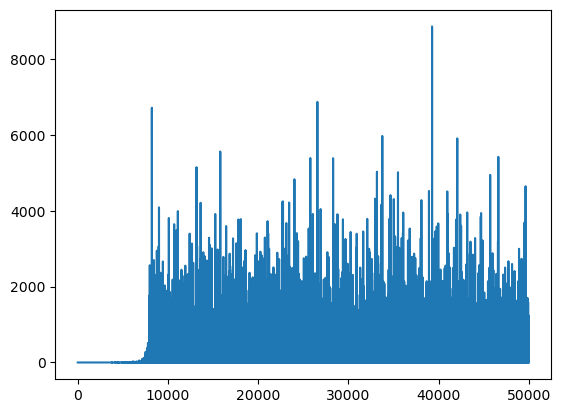

In [5]:

grid_size = 50
num_grains = 50000
data = Sandpile(grid_size=grid_size)

coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
for coordinate in coordinates:
    data.add_sand(coordinate[0], coordinate[1])
plt.plot(data.pl_data)

{1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0], 7: [0], 8: [0], 9: [0], 10: [0], 11: [0], 12: [0], 13: [0], 14: [0], 15: [0], 16: [0], 17: [0], 18: [0], 19: [0], 20: [0], 21: [0], 22: [0], 23: [0], 24: [0], 25: [0], 26: [0], 27: [0], 28: [0], 29: [0], 30: [0], 31: [0], 32: [0], 33: [0], 34: [0], 35: [0], 36: [0], 37: [0], 38: [0], 39: [0], 40: [0], 41: [0], 42: [0], 43: [0], 44: [0], 45: [0], 46: [0], 47: [0], 48: [0], 49: [0], 50: [0], 51: [0], 52: [0], 53: [0], 54: [0], 55: [0], 56: [0], 57: [0], 58: [0], 59: [0], 60: [0], 61: [0], 62: [0], 63: [0], 64: [0], 65: [0], 66: [0], 67: [0], 68: [0], 69: [0], 70: [0], 71: [0], 72: [0], 73: [0], 74: [0], 75: [0], 76: [0], 77: [0], 78: [0], 79: [0], 80: [0], 81: [0], 82: [0], 83: [0], 84: [0], 85: [0], 86: [0], 87: [0], 88: [0], 89: [0], 90: [0], 91: [0], 92: [0], 93: [0], 94: [0], 95: [0], 96: [0], 97: [0], 98: [0], 99: [0], 100: [0], 101: [0], 102: [0], 103: [0], 104: [0], 105: [0], 106: [0], 107: [0], 108: [0], 109: [0], 110: [0], 111: [0

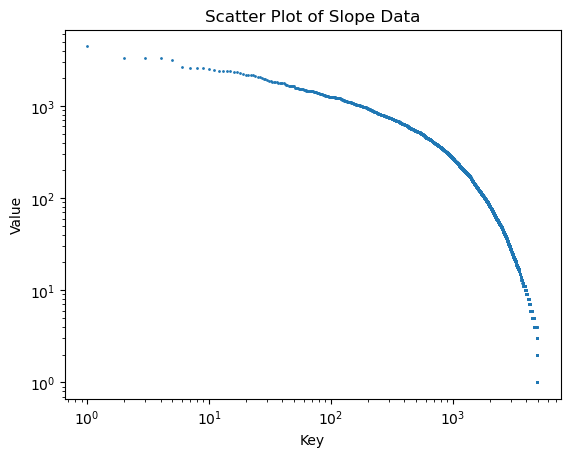

In [69]:
print(data.slope_data)
# Prepare data for scatter plot
x_values = []
y_values = []

for key, values in data.slope_data.items():
    x_values.extend([key] * len(values))
    y_values.extend(values)

# Create scatter plot
plt.scatter(x_values, sorted(y_values, reverse=True), s = 1)

# Add labels and title
plt.xlabel("Key")
plt.ylabel("Value")
plt.title("Scatter Plot of Slope Data")
plt.xscale('log')
plt.yscale('log')
# Show the plot
plt.show()

In [15]:
list_of_slope_dicts = []
for sandpile in s:
    d = {}
    for key, value in sandpile.slope_data.items():
        d[key] = np.mean(value)
    
    list_of_slope_dicts.append(d)

In [16]:
sum_dict = {}
count_dict = {}

# Iterate through each dictionary in the list
for d in list_of_slope_dicts:
    for key, value in d.items():
        if key in sum_dict:
            sum_dict[key] += value
            count_dict[key] += 1
        else:
            sum_dict[key] = value
            count_dict[key] = 1

# Calculate the mean for each key
mean_dict = {key: sum_dict[key] / count_dict[key] for key in sum_dict}

# Print the resulting dictionary
print(mean_dict)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105: 0.0, 106: 0.0, 107: 0.0, 108: 0.0, 109: 0.0, 110: 0.0, 111: 0.

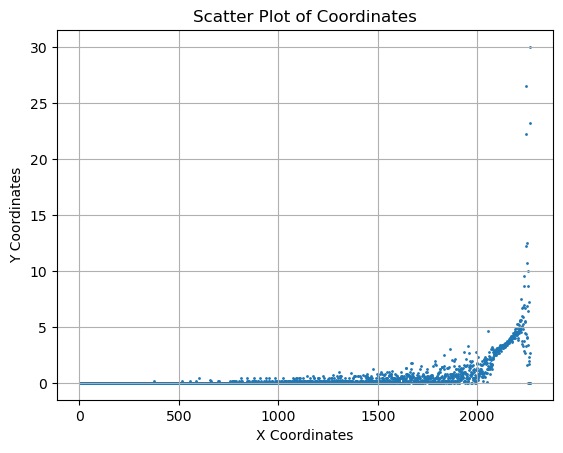

In [17]:

x_coords = list(mean_dict.keys())[:]
y_coords = list(mean_dict.values())[:]

# Plotting the coordinates
plt.scatter(x_coords, y_coords, marker='o', s=1)
plt.title('Scatter Plot of Coordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()

In [18]:
grid_size = 100
num_grains = 50000

sandpile = Sandpile(grid_size)
#coordinates = np.random.randint(grid_size//2, grid_size//2, size=(num_grains, 2))
coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in coordinates:
    sandpile.add_sand(coord[0], coord[1])



/tmp/ipykernel_144878/8000977.py:4: RuntimeWarning: divide by zero encountered in log
  l = np.log(s_data)


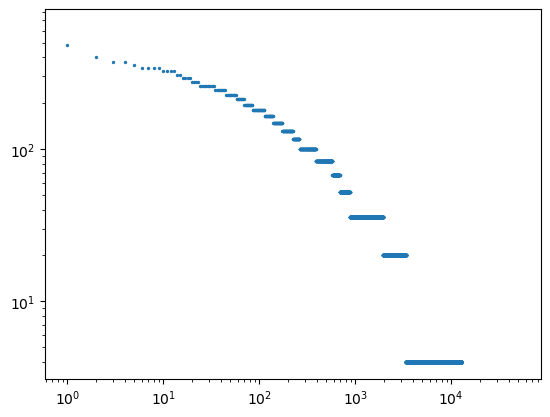

In [21]:
data = sandpile.pl_data

s_data = sorted(data, reverse=True)
l = np.log(s_data)
plt.scatter((np.arange(len(s_data))), s_data, s=2)
plt.xscale('log')
plt.yscale('log')

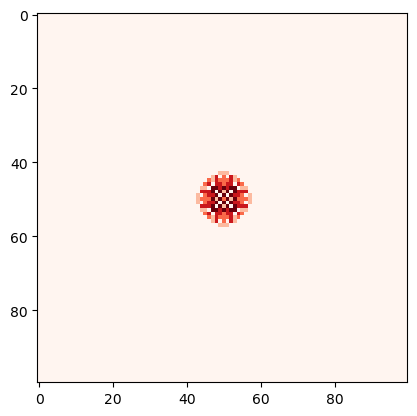

In [152]:
plt.imshow(sandpile.grid, cmap="Reds")